In [1]:
using QuantumOptics
using PyPlot

Dicke Model

$$ H = \omega a^\dagger a + \epsilon S_z + \frac{\lambda}{\sqrt{N}}(a^\dagger J_{-} + a J_{+}) $$

con $0<\lambda<\infty$ la constante de acoplamiento átomo-campo y 
$$S_z = \frac{1}{2} \sum_{i=1}^N \sigma_{z}^{(i)} $$
$$ J_{\pm} = \frac{1}{2} \sum_{i=1}^N (\sigma_{\pm}^{(i)} + \mu \sigma_{\mp}^{(i)}) $$

Si ahora lo tomamos para dos átomos tendremos: 

$$ H = \omega a^\dagger a + \epsilon \frac{1}{2} \sum_{i=1}^2 \sigma_{z}^{(i)} + \frac{\lambda}{\sqrt{2}}(a^\dagger (\frac{1}{2} \sum_{i=1}^2 (\sigma_{-}^{(i)} + \mu \sigma_{-}^{(i)}) + a(\frac{1}{2} \sum_{i=1}^2 (\sigma_{+}^{(i)} + \mu \sigma_{+}^{(i)})) $$

$$ \Rightarrow H = \omega a^\dagger a + \epsilon \frac{1}{2} (\sigma_z^{(1)} + \sigma_z^{(2)}) + 
\frac{\lambda}{2\sqrt{2}}(a^\dagger(\sigma_-^{(1)} + \mu \sigma_-^{(1)} + \sigma_-^{(2)} + \mu \sigma_-^{(2)}) + a(\sigma_+^{(1)} + \mu \sigma_+^{(1)} + \sigma_+^{(2)} + \mu \sigma_+^{(2)}))$$

In [2]:
ω_C = 2*π       #Cavity Frecuency
ω_A = 2*π       #Atom Frecuency
g = 2*π*0.05    #Coupling Strength
#g = 1
κ = 0.005        #Cavity Dissipation Rate
γ = 0.05        #Atom Dissipation Rate
N = 15          #Number of Cavity Fock States
#μ = 1
μ = 0           #Rotating Wave

b_fock = FockBasis(N)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin

a = destroy(b_fock) 
at = create(b_fock)
n = number(b_fock)

# Es importante notar el orden en el producto.  |n\rangle|spin_1\rangle|spin_2\rangle$

sm_1 = sigmam(b_spin) ⊗ identityoperator(b_spin)
sm_2 = identityoperator(b_spin) ⊗ sigmam(b_spin)
sp_1 = sigmap(b_spin) ⊗ identityoperator(b_spin)
sp_2 = identityoperator(b_spin) ⊗ sigmap(b_spin)  
sz_1 = sigmaz(b_spin) ⊗ identityoperator(b_spin)
sz_2 = identityoperator(b_spin) ⊗ sigmaz(b_spin)
Dz = (1/2)*(sz_1 + sz_2);

In [3]:
# Hamiltoniano
H_field = (ω_C*at*a)
H_atom = ω_A/2 * (sz_1+ sz_2)
H_atom_field = (g/(2*sqrt(2)))*(at ⊗ (sm_1 + μ*sm_1 + sm_2 + μ*sm_2) + a ⊗ (sp_1 + μ*sp_1 + sp_2 + μ*sp_2))

H_1 = H_field ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin)
H_2 = identityoperator(b_fock) ⊗ H_atom

H = H_1 + H_2 + H_atom_field

#Tiempo
tiempo = Array(linspace(0,100,1000));

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in transpose(::QuantumOptics.operators_sparse.SparseOperator) at ./deprecated.jl:770
 in ctranspose at ./operators.jl:315 [inlined]
 in Ac_mul_B(::QuantumOptics.operators_sparse.SparseOperator, ::QuantumOptics.operators_sparse.SparseOperator) at ./operators.jl:319
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/nicolas/.julia/v0.5/IJulia/src/execute_request.jl:169
 in eventloop(::ZMQ.Socket) at /home/nicolas/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::

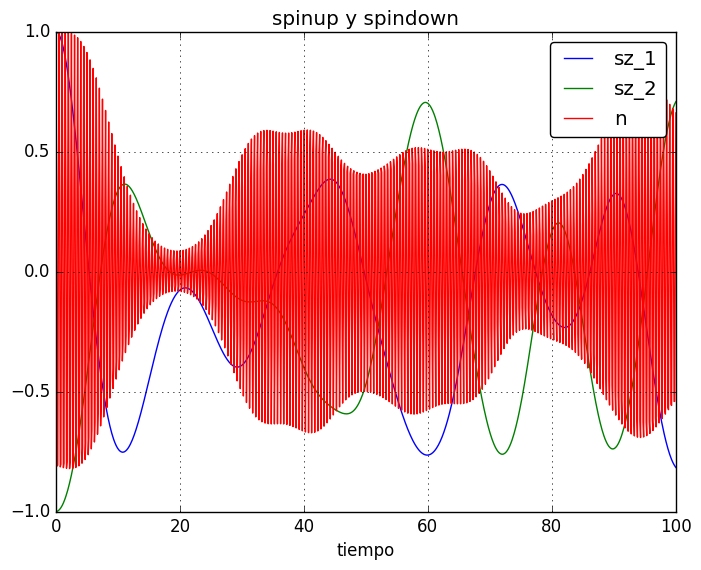

IJulia.##9#15)() at ./task.jl:360
while loading In[4], in expression starting on line 8


PyObject <matplotlib.legend.Legend object at 0x7f873e907400>

In [4]:
# spinup y spindown
ψ_inicial_up_down = coherentstate(b_fock, 1) ⊗ (spinup(b_spin)) ⊗ (spindown(b_spin))

tout, ψ_evol_up_down = timeevolution.schroedinger(tiempo, ψ_inicial_up_down, H)

expec_sz_1_up_down = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_up_down)
expec_sz_2_up_down = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_up_down)
expec_n_up_down = expect(a'*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_up_down)

plot(tiempo, expec_sz_1_up_down, label = "sz_1")
plot(tiempo, expec_sz_2_up_down, label = "sz_2")
plot(tiempo, expec_n_up_down, label = "n")

title("spinup y spindown")
xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

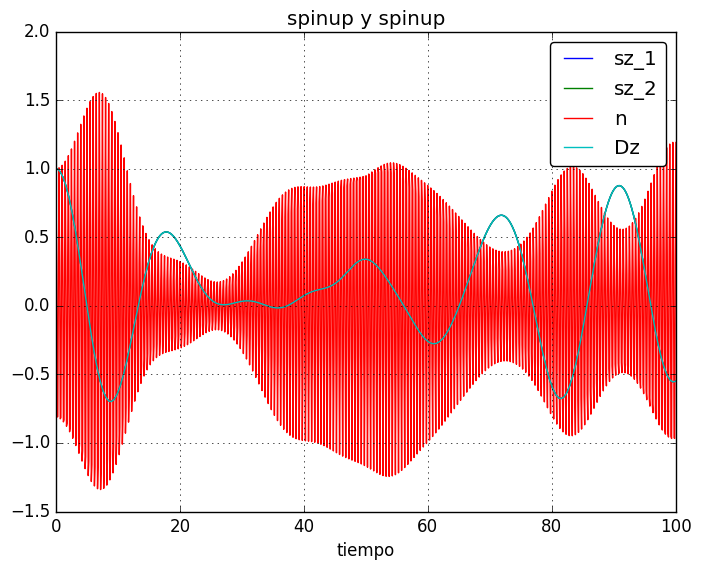

  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/nicolas/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/nicolas/.julia/v0.5/PyCall/sr

PyObject <matplotlib.legend.Legend object at 0x7f873ea65390>

In [5]:
# spinup y spinup
ψ_inicial_up_up = coherentstate(b_fock, 1) ⊗ (spinup(b_spin)) ⊗ (spinup(b_spin))

tout, ψ_evol_up_up = timeevolution.schroedinger(tiempo, ψ_inicial_up_up, H)

expec_sz_1_up_up = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_up_up)
expec_sz_2_up_up = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_up_up)
expec_n_up_up = expect(a'*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_up_up)
expec_dz_up_up = expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_up_up)

plot(tiempo, expec_sz_1_up_up, label = "sz_1")
plot(tiempo, expec_sz_2_up_up, label = "sz_2")
plot(tiempo, expec_n_up_up, label = "n")
plot(tiempo, expec_dz_up_up, label = "Dz")

title("spinup y spinup")
xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

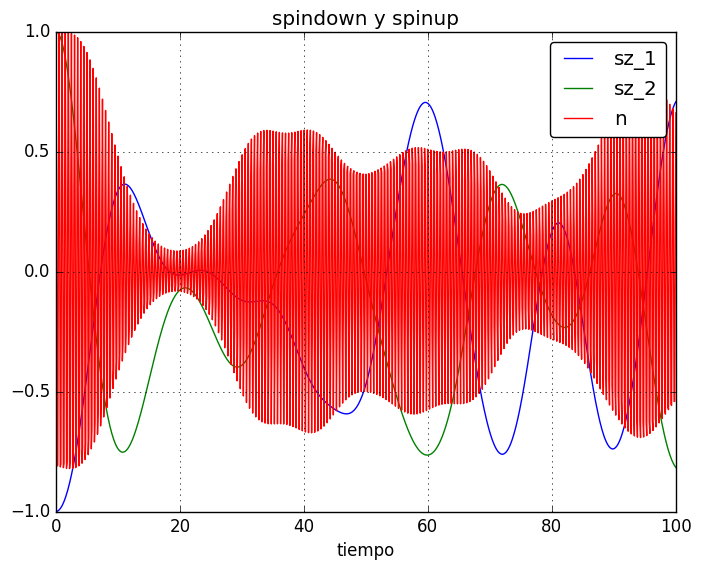

PyObject <matplotlib.legend.Legend object at 0x7f873e96a9e8>

In [6]:
# spindown y spinup
ψ_inicial_down_up = coherentstate(b_fock, 1) ⊗ (spindown(b_spin)) ⊗ (spinup(b_spin))

tout, ψ_evol_down_up = timeevolution.schroedinger(tiempo, ψ_inicial_down_up, H)

expec_sz_1_down_up = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_down_up)
expec_sz_2_down_up = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_down_up)
expec_n_down_up = expect(a'*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_down_up)


plot(tiempo, expec_sz_1_down_up, label = "sz_1")
plot(tiempo, expec_sz_2_down_up, label = "sz_2")
plot(tiempo, expec_n_down_up, label = "n")

title("spindown y spinup")
xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

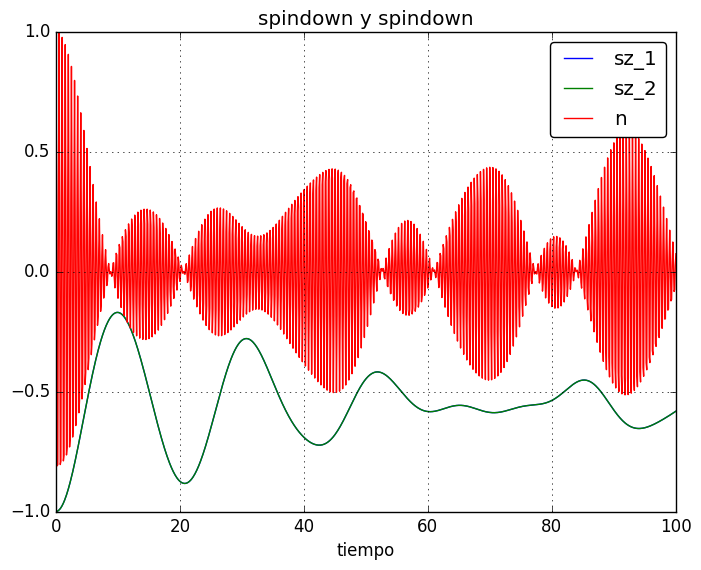

PyObject <matplotlib.legend.Legend object at 0x7f873e8fe320>

In [7]:
# spindown y spindown
ψ_inicial_down_down = coherentstate(b_fock, 1) ⊗ (spindown(b_spin)) ⊗ (spindown(b_spin))

tout, ψ_evol_down_down = timeevolution.schroedinger(tiempo, ψ_inicial_down_down, H)

expec_sz_1_down_down = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_down_down)
expec_sz_2_down_down = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_down_down)
expec_n_down_down = expect(a'*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_down_down)


plot(tiempo, expec_sz_1_down_down, label = "sz_1")
plot(tiempo, expec_sz_2_down_down, label = "sz_2")
plot(tiempo, expec_n_down_down, label = "n")

title("spindown y spindown")
xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

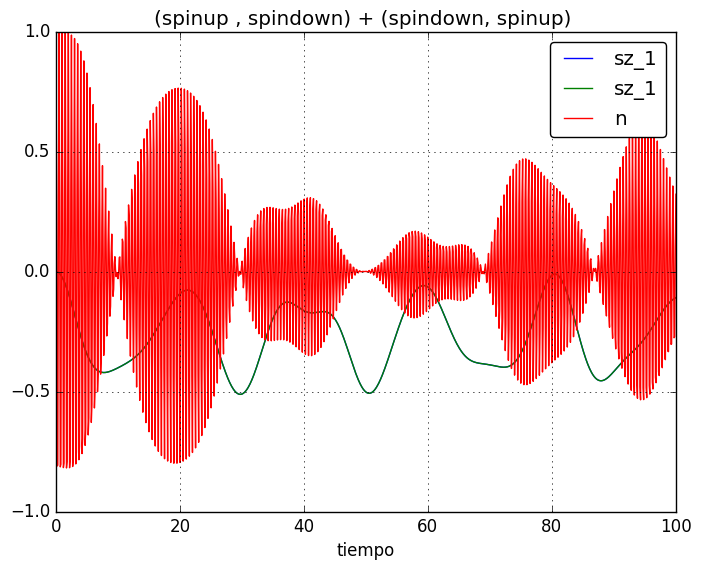

PyObject <matplotlib.legend.Legend object at 0x7f873e5b6c88>

In [8]:
ψ_inicial_combinacion = (1/(sqrt(2)))*(ψ_inicial_up_down + ψ_inicial_down_up)

tout, ψ_evol_combinacion = timeevolution.schroedinger(tiempo, ψ_inicial_combinacion, H)

expec_sz_1_combinacion = expect(identityoperator(b_fock) ⊗ sz_1, ψ_evol_combinacion)
expec_sz_2_combinacion = expect(identityoperator(b_fock) ⊗ sz_2, ψ_evol_combinacion)
expec_n_combinacion = expect(a'*a ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin), ψ_evol_combinacion)


plot(tiempo, expec_sz_1_combinacion, label = "sz_1")
plot(tiempo, expec_sz_2_combinacion, label = "sz_1")
plot(tiempo, expec_n_combinacion, label = "n")

title("(spinup , spindown) + (spindown, spinup) ")
xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

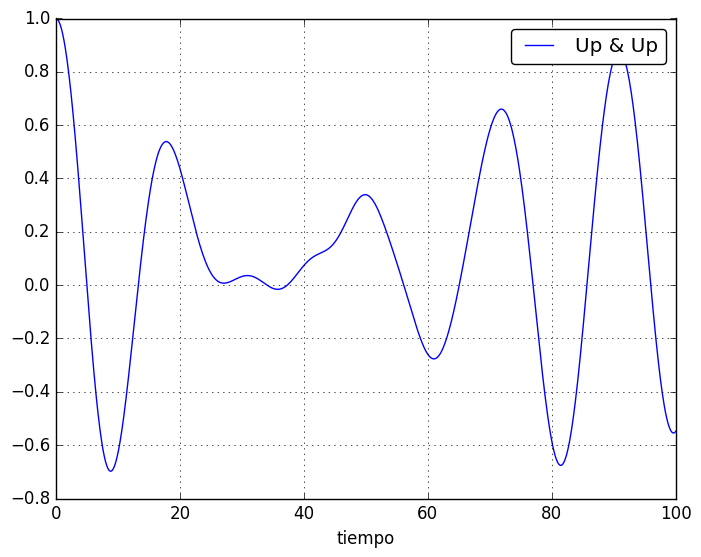

PyObject <matplotlib.legend.Legend object at 0x7f8738584438>

In [9]:
expec_up_up = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_up_up))
expec_down_down = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_down_down))
expec_combinacion = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_combinacion))

plot(tiempo, expec_up_up, label = "Up & Up")
#plot(tiempo, expec_down_down, label = "Down & Down")
#plot(tiempo, expec_combinacion, label = "Combinación")

xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")